# Abundances

Synthesizer can be used to generate abundance patterns, in total and for gas and dust individually, for a given metallicity, alpha ehancement, and arbitrary element scalings.

At present this functionality is only utilised when creating cloudy input scripts. These scripts are used to calculate nebular line and continuum emission for a given incident spectral energy distribution and gas abundance pattern.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from synthesizer.abundances import (
    Abundances,
    abundance_scalings,
    depletion_models,
    plot_abundance_pattern,
    plot_multiple_abundance_patterns,
    reference_abundance_patterns,
)

by default initialising `Abundances` creates a solar abundance pattern with no depletion. The default solar abundance pattern is Asplund et al. (2009), though this can be changed if desired. 

In [2]:
a0 = Abundances()

isinstance(Abundances, type)

True

like most synthesizer objects we can explore the important attributes of an object by using `print()`:

In [3]:
print(a0)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.710
Y: 0.275
Z: 0.015
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            0.08             1.00             -1.01            -inf            
lithium          -8.70            3.30             0.02             1.00             -8.70            -inf            
beryllium        -10.66           1.34             0.02             1.00             -10.66           -inf            
boron            -9.17            2.83             0.02             1.00             -9.17            -inf            
carbon           -3.56            8.44             0.02             1.00             -3.56            -inf            
nitrogen 

You can access the logarithmic abundances ($\log_{10}(N_X/N_H)$) of an element like this:

In [4]:
print(f"log10(O/H): {a0.total['O']:.2f}")
print(f"log10(O/H): {a0['O']:.2f}")

log10(O/H): -3.22
log10(O/H): -3.22


## Solar abundance pattern

As noted, there are several reference abundance patterns built into synthesizer. These can be accessed from `synthesizer.abundances.reference_abundance_patterns`:

In [5]:
reference_abundance_patterns.available_patterns

['Asplund2009', 'GalacticConcordance', 'Gutkin2016']

In [6]:
reference = reference_abundance_patterns.Asplund2009()
reference.ads
reference.abundance

{'H': 0.0,
 'He': -1.07,
 'Li': -10.95,
 'Be': -10.62,
 'B': -9.3,
 'C': -3.57,
 'N': -4.17,
 'O': -3.31,
 'F': -7.44,
 'Ne': -4.07,
 'Na': -5.07,
 'Mg': -4.4,
 'Al': -5.55,
 'Si': -4.49,
 'P': -6.59,
 'S': -4.88,
 'Cl': -6.5,
 'Ar': -5.6,
 'K': -6.97,
 'Ca': -5.66,
 'Sc': -8.85,
 'Ti': -7.05,
 'V': -8.07,
 'Cr': -6.36,
 'Mn': -6.57,
 'Fe': -4.5,
 'Co': -7.01,
 'Ni': -5.78,
 'Cu': -7.81,
 'Zn': -7.44}

In [7]:
a1 = Abundances(reference=reference_abundance_patterns.Gutkin2016)
print(a1)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.709
Y: 0.276
Z: 0.015
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            -0.00            1.00             -1.01            -inf            
lithium          -10.99           1.01             0.00             1.00             -10.99           -inf            
beryllium        -10.63           1.37             0.00             1.00             -10.63           -inf            
boron            -9.47            2.53             0.00             1.00             -9.47            -inf            
carbon           -3.53            8.47             0.00             1.00             -3.53            -inf            
nitrogen 

Solar abundance classes can also be called using a string representation of the name.

In [8]:
a1 = Abundances(reference="Gutkin2016")
print(a1)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.709
Y: 0.276
Z: 0.015
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            -0.00            1.00             -1.01            -inf            
lithium          -10.99           1.01             0.00             1.00             -10.99           -inf            
beryllium        -10.63           1.37             0.00             1.00             -10.63           -inf            
boron            -9.47            2.53             0.00             1.00             -9.47            -inf            
carbon           -3.53            8.47             0.00             1.00             -3.53            -inf            
nitrogen 

## Metallicity

We can specify a different metallicity. By default abundances are scaled from the Solar abundances provided through an optional argument (default Asplund et a. 2009). However, as we will see later, it is possible to set a different $\alpha$-enhancement or set arbitrary element scalings.

In [9]:
a2 = Abundances(metallicity=0.01)
print(a2)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_ref: 0.67
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.04            10.96            0.05             1.00             -1.04            -inf            
lithium          -8.89            3.11             -0.16            1.00             -8.89            -inf            
beryllium        -10.84           1.16             -0.16            1.00             -10.84           -inf            
boron            -9.36            2.64             -0.16            1.00             -9.36            -inf            
carbon           -3.74            8.26             -0.16            1.00             -3.74            -inf            
nitrog

## $\alpha$-enhancement

We can also generate abundance patterns assuming different $\alpha$-enhancements. In this case it is necessary to re-scale the non-$\alpha$ elements to recover the input metallicity.

In [10]:
a3 = Abundances(alpha=0.6)
print(a3)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.710
Y: 0.275
Z: 0.015
Z/Z_ref: 1
alpha: 0.600
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            0.08             1.00             -1.01            -inf            
lithium          -9.19            2.81             -0.47            1.00             -9.19            -inf            
beryllium        -11.15           0.85             -0.47            1.00             -11.15           -inf            
boron            -9.66            2.34             -0.47            1.00             -9.66            -inf            
carbon           -4.04            7.96             -0.47            1.00             -4.04            -inf            
nitrogen 

We can print a relative solar abundance like this:

In [11]:
print(f"[O/Fe] = {a3.reference_relative_abundance('O', ref_element='Fe'):.2f}")
print(f"[O/Fe] = {a3['[O/Fe]']:.2f}")
print(f"[B/Fe] = {a3['[B/Fe]']:.2f}")

[O/Fe] = 0.60
[O/Fe] = 0.60
[B/Fe] = 0.00


That, is, as expected given that we set $\alpha=0.6$.

## Depletion

To account for metals being locked up in dust, we can also specify a depletion pattern. It is possible to either provide a dictionary of values or specify one of the in-built patterns. 

In [12]:
# assume 99% of Carbon and Iron are depleted on to dust
depletion = {"C": 0.99, "Fe": 0.99}

# calculate the abundance patterns, now included gas and dust separately
a4 = Abundances(metallicity=0.01, depletion=depletion)
print(a4)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.724
Y: 0.266
Z: 0.010
Z/Z_ref: 0.67
alpha: 0.000
dust mass fraction: 2.486382257427241e-05
dust-to-metal ratio: 0.002486382257427241
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.04            10.96            0.05             1.00             -1.04            -inf            
lithium          -8.89            3.11             -0.16            1.00             -8.89            -inf            
beryllium        -10.84           1.16             -0.16            1.00             -10.84           -inf            
boron            -9.36            2.64             -0.16            1.00             -9.36            -inf            
carbon           -3.74            8.26             -0.16            0.99             -3.74

In [13]:
a5 = Abundances(
    metallicity=0.0156,
    reference=reference_abundance_patterns.Gutkin2016,
    depletion_model=depletion_models.Gutkin2016,
)
print(a5)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.0062629182900424815
dust-to-metal ratio: 0.40146912115656935
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            -0.00            1.00             -1.01            -inf            
lithium          -10.98           1.02             0.01             0.16             -11.77           -11.05          
beryllium        -10.62           1.38             0.01             0.60             -10.84           -11.01          
boron            -9.46            2.54             0.01             0.13             -10.34           -9.52           
carbon           -3.52            8.48             0.01             0.50             -3.82    

In [14]:
a6 = Abundances(
    metallicity=0.0156,
    reference=reference_abundance_patterns.Gutkin2016,
    depletion_model=depletion_models.CloudyClassic,
)
print(a6)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.007361330259064843
dust-to-metal ratio: 0.4718801448118489
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            -0.00            1.00             -1.01            -inf            
lithium          -10.98           1.02             0.01             0.16             -11.77           -11.05          
beryllium        -10.62           1.38             0.01             0.60             -10.84           -11.01          
boron            -9.46            2.54             0.01             0.13             -10.34           -9.52           
carbon           -3.52            8.48             0.01             0.40             -3.91      

In [15]:
a7 = Abundances(
    metallicity=0.0156,
    reference=reference_abundance_patterns.Gutkin2016,
    depletion_model=depletion_models.Jenkins2009_Gunasekera2021,
)
print(a7)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.708
Y: 0.276
Z: 0.016
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.005665821639073615
dust-to-metal ratio: 0.3631936948124112
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            -0.00            1.00             -1.01            -inf            
lithium          -10.98           1.02             0.01             0.15             -11.79           -11.05          
beryllium        -10.62           1.38             0.01             1.00             -10.62           -inf            
boron            -9.46            2.54             0.01             1.00             -9.46            -inf            
carbon           -3.52            8.48             0.01             0.69             -3.68      

When specifying an in-built pattern it's also possible to specify an optional scaling parameter depending on the particular model.

Below we explore the effect of $F_{*}$ on the depletion factors for N, O, and S. 

In [16]:
for element in ["N", "O", "S"]:
    print(element, "-" * 5)
    for fstar in [0.0, 0.5, 1.0]:
        depletion = depletion_models.Jenkins2009_Gunasekera2021(
            fstar
        ).depletion[element]
        print(f"{fstar} {depletion:.2f} {np.log10(depletion):.2f}")

N -----
0.0 0.78 -0.11
0.5 0.78 -0.11
1.0 0.78 -0.11
O -----
0.0 0.97 -0.01
0.5 0.75 -0.13
1.0 0.57 -0.24
S -----
0.0 1.00 0.00
0.5 0.53 -0.27
1.0 0.19 -0.71


Next, we explore the effect of $F_{*}$ on the dust mass fraction and dust-to-metal ratio ($\xi_{d}$):

In [17]:
print("F_*", "dust_abundance", "dust_mass_fraction", "dust_to_metal_ratio")
for fstar in [0.0, 0.1, 0.25, 0.5, 1.0]:
    a = Abundances(
        metallicity=0.0156,
        reference=reference_abundance_patterns.Gutkin2016,
        depletion_model=depletion_models.Jenkins2009_Gunasekera2021,
        depletion_scale=fstar,
    )
    print(
        fstar,
        f"{a.dust_abundance:.2g}",
        f"{a.dust_mass_fraction:.2g}",
        f"{a.dust_to_metal_ratio:.2g}",
    )

F_* dust_abundance dust_mass_fraction dust_to_metal_ratio
0.0 0.00017 0.0028 0.18
0.1 0.00022 0.0035 0.22
0.25 0.00029 0.0044 0.28
0.5 0.00039 0.0057 0.36
1.0 0.00055 0.0075 0.48


We can also adjust the depletion scale in place and recalculate the dust mass:

In [18]:
a = Abundances(
    metallicity=0.0156,
    reference=reference_abundance_patterns.Gutkin2016,
    depletion_model=depletion_models.Jenkins2009_Gunasekera2021,
    depletion_scale=0.5,
)

print(f"{a.dust_abundance:.2g}")

a.add_depletion(
    depletion_model="Jenkins2009_Gunasekera2021", depletion_scale=1.0
)

print(f"{a.dust_abundance:.2g}")

a.add_depletion(
    depletion_model="Jenkins2009_Gunasekera2021", depletion_scale=0.5
)

print(f"{a.dust_abundance:.2g}")

0.00039
0.00055
0.00039


In [19]:
# define default model
a = Abundances(
    metallicity=0.0156,
    reference=reference_abundance_patterns.Gutkin2016,
    depletion_model=depletion_models.Jenkins2009_Gunasekera2021,
    depletion_scale=0.5,
)


default_dust_mass_fraction = a.dust_mass_fraction

# vary fstar and recalaculate the dust_mass_fraction
for fstar in [0.0, 0.1, 0.25, 0.5, 1.0]:
    # recalcualte for different fstar
    a.add_depletion(
        depletion_model="Jenkins2009_Gunasekera2021", depletion_scale=fstar
    )

    dust_mass_fraction = a.dust_mass_fraction

    print(
        f"""{fstar} {default_dust_mass_fraction:.4f} {dust_mass_fraction:.4f}
        {dust_mass_fraction/default_dust_mass_fraction:.2f}"""
    )

0.0 0.0057 0.0028
        0.49
0.1 0.0057 0.0035
        0.61
0.25 0.0057 0.0044
        0.77
0.5 0.0057 0.0057
        1.00
1.0 0.0057 0.0075
        1.33


When the depletion is applied the total, gas, and dust abundance patterns are provided e.g.

In [20]:
print(f'log10(C_total/H) : {a7.total["C"]:.2f}')
print(f'log10(C_gas/H) : {a7.gas["C"]:.2f}')
print(f'log10(C_dust/H) : {a7.dust["C"]:.2f}')

log10(C_total/H) : -3.52
log10(C_gas/H) : -3.68
log10(C_dust/H) : -4.02


## Arbitrary element scaling

We can also change the abundance of any specific element (or set of elements), with the abundances of other elements rescaled self-consistently to yield the correct metallicity. 

If the abundance is a float it is the logarithmic abundance ($\log_{10}(X/H)$) while if it is a string it is one of the in-built functions that scale the abundance with metallicity (e.g. the model proposed by Dopita et al. 2006). Note, combining this with a non-zero `alpha` can lead to a mild inconsistency.

Using a float for the absolute abundance (relative to H):

In [21]:
a8 = Abundances(metallicity=0.0134, abundances={"nitrogen": -4.5})
print(a8)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_ref: 0.89
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.02            10.98            0.07             1.00             -1.02            -inf            
lithium          -8.74            3.26             -0.02            1.00             -8.74            -inf            
beryllium        -10.70           1.30             -0.02            1.00             -10.70           -inf            
boron            -9.21            2.79             -0.02            1.00             -9.21            -inf            
carbon           -3.60            8.40             -0.02            1.00             -3.60            -inf            
nitrog

Providing an abundance relative to another element:

In [22]:
a9a = Abundances(metallicity=0.0134, abundances={"nitrogen_to_oxygen": -0.4})
print(a9a)

# same as above but less PEP8 compliant
a9b = Abundances(metallicity=0.0134, abundances={"N/O": -0.4})
print(a9b)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_ref: 0.89
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.02            10.98            0.07             1.00             -1.02            -inf            
lithium          -8.80            3.20             -0.08            1.00             -8.80            -inf            
beryllium        -10.76           1.24             -0.08            1.00             -10.76           -inf            
boron            -9.27            2.73             -0.08            1.00             -9.27            -inf            
carbon           -3.65            8.35             -0.08            1.00             -3.65            -inf            
nitrog

Alternatively, we can use a built-in function for particular set of elements or for all elements available. For example, here we use the Dopita (2006) scaling relation to adjust Nitrogen.

In [23]:
a10 = Abundances(metallicity=0.0134, abundances={"nitrogen": "Dopita2006"})
print(a10)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.714
Y: 0.272
Z: 0.013
Z/Z_ref: 0.89
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.02            10.98            0.07             1.00             -1.02            -inf            
lithium          -8.75            3.25             -0.03            1.00             -8.75            -inf            
beryllium        -10.71           1.29             -0.03            1.00             -10.71           -inf            
boron            -9.22            2.78             -0.03            1.00             -9.22            -inf            
carbon           -3.60            8.40             -0.03            1.00             -3.60            -inf            
nitrog

We can also use a model to set all scalings for all available elements.

In [24]:
a11 = Abundances(metallicity=0.015, abundances="GalacticConcordance")
print(a11)

--------------------
ABUNDANCE PATTERN SUMMARY
X: 0.710
Y: 0.275
Z: 0.015
Z/Z_ref: 1
alpha: 0.000
dust mass fraction: 0.0
dust-to-metal ratio: 0.0
----------
Element          log10(X/H)       log10(X/H)+12    [X/H]            depletion        log10(X/H)_gas   log10(X/H)_dust 
hydrogen         0.00             12.00            0.00             1.00             0.00             -inf            
helium           -1.01            10.99            0.08             1.00             -1.01            -inf            
lithium          -8.68            3.32             0.05             1.00             -8.68            -inf            
beryllium        -10.63           1.37             0.05             1.00             -10.63           -inf            
boron            -9.15            2.85             0.05             1.00             -9.15            -inf            
carbon           -3.58            8.42             0.00             1.00             -3.58            -inf            
nitrogen 

### Scaling models

Let's look in a bit more detail at some of the available scaling relationships.

We can also access the scaling functions directly:

In [25]:
abundance_scalings.available_scalings

['Dopita2006', 'GalacticConcordance']

In [26]:
abundance_scalings.GalacticConcordance().available_elements

['N',
 'C',
 'F',
 'Ne',
 'Na',
 'Mg',
 'Al',
 'Si',
 'P',
 'S',
 'Cl',
 'Ar',
 'K',
 'Ca',
 'Sc',
 'Ti',
 'V',
 'Cr',
 'Mn',
 'Fe',
 'Co',
 'Ni',
 'Cu',
 'Zn']

In [27]:
abundance_scalings.GalacticConcordance().nitrogen(0.016)

np.float64(-4.156584981878675)

These functions also include useful meta data:

In [28]:
print(abundance_scalings.GalacticConcordance().ads)
print(abundance_scalings.GalacticConcordance().doi)

https://ui.adsabs.harvard.edu/abs/2017MNRAS.466.4403N/abstract
https://doi.org/10.1093/mnras/stw3235


Let's dig a little deeper and make a plot of X/O vs. O/H for one of these scalings. 

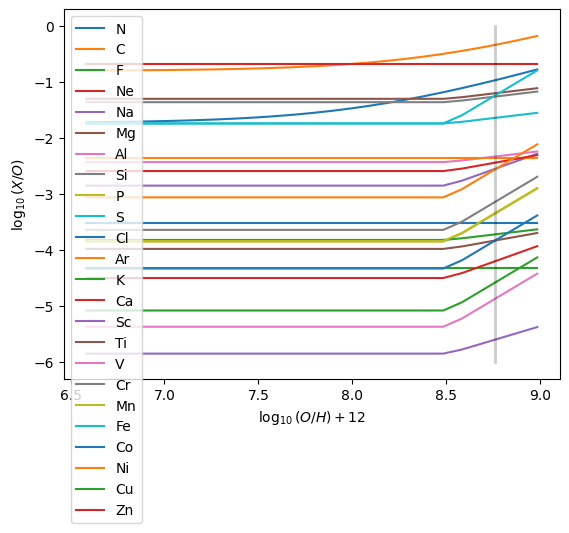

In [29]:
scaling_study_name = "GalacticConcordance"

# create an array of metallicities equally space in log-space
log10metallicities = np.arange(-4.0, -1.5, 0.1)
metallicities = 10**log10metallicities

# the reference oxygen abundance for GalacticConcordance, i.e. [O/H]
reference_oxygen_abundance = -3.24
reference_metallicity = 0.015

# (O/H), assumed to scale linearly with metallicity
oxygen_abundance = reference_oxygen_abundance + np.log10(
    metallicities / reference_metallicity
)

scaling_study = getattr(abundance_scalings, scaling_study_name)()

for element, element_name in zip(
    scaling_study.available_elements, scaling_study.available_elements_names
):
    scaling = getattr(scaling_study, element_name)

    abundances = np.array(
        [scaling(metallicity) for metallicity in metallicities]
    )

    # log10(N/O) = log10(N/H) - log10(O/H)
    x_to_oxygen_ratios = abundances - oxygen_abundance

    plt.plot(oxygen_abundance + 12.0, x_to_oxygen_ratios, label=element)

plt.plot(
    [reference_oxygen_abundance + 12] * 2, [-6.0, -0.0], alpha=0.2, lw=2, c="k"
)

plt.ylabel(r"$\log_{10}(X/O)$")
plt.xlabel(r"$\log_{10}(O/H)+12$")
plt.legend()
plt.show()

## Plots

There are also a helper functions for plotting one or more abundance patterns, here we plot two abundance patterns with different alpha abundances:

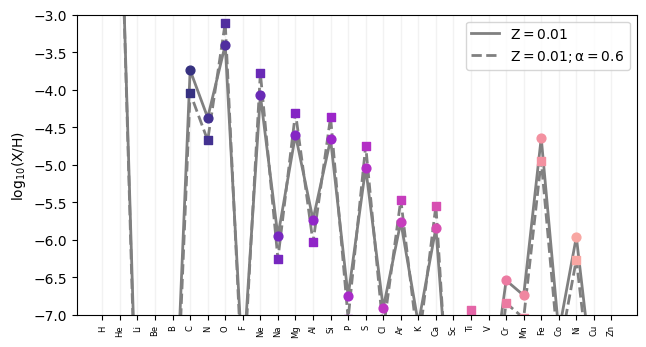

(<Figure size 700x400 with 1 Axes>, <Axes: ylabel='$\\rm log_{10}(X/H)$'>)

In [30]:
plot_multiple_abundance_patterns(
    [a2, a3],
    labels=[r"Z=0.01", r"Z=0.01; \alpha = 0.6"],
    show=True,
    ylim=[-7.0, -3.0],
)

We can plot the abundance pattern of each component:

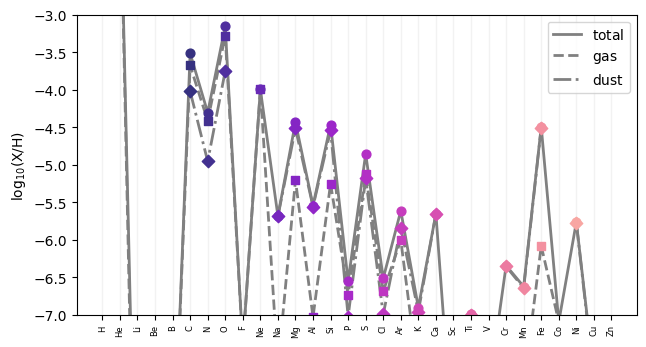

(<Figure size 700x400 with 1 Axes>, <Axes: ylabel='$\\rm log_{10}(X/H)$'>)

In [31]:
plot_abundance_pattern(
    a7, show=True, ylim=[-7.0, -3.0], components=["total", "gas", "dust"]
)